In [1]:
import numpy as np

# Definir semente para reprodutibilidade
np.random.seed(42)

# Número de observações
N = 10

# Variável independente (X) — valores aleatórios uniformes entre 0 e 1
X = np.random.rand(N)

# Variável dependente (Y) — relação linear com ruído
Y = 2.5 * X + np.random.randn(N) * 0.3

# Exibir resultados
print("X =", np.round(X, 3))
print("Y =", np.round(Y, 3))

X = [0.375 0.951 0.732 0.599 0.156 0.156 0.058 0.866 0.601 0.708]
Y = [ 0.796  2.54   1.691  1.357  0.463 -0.184 -0.372  1.997  1.199  1.864]


In [10]:
X_media=X.mean()
Y_media=Y.mean()

print("média de X =", np.round(X_media, 3))
print("média de Y =", np.round(Y_media, 3))

média de X = 0.52
média de Y = 1.135


In [15]:
X_dif_da_media = X - X_media
Y_dif_da_media = Y - Y_media

print("diferença das médias de X=\n", X_dif_da_media)

print("Vetor esse cuja média é\n", np.round(X_dif_da_media.mean()),"\n")

print("diferença das médias de Y \n=", Y_dif_da_media)

print("Vetor esse cuja média é\n", np.round(Y_dif_da_media.mean()))

diferença das médias de X=
 [-0.14559662  0.43057757  0.21185721  0.07852175 -0.3641181  -0.36414222
 -0.46205312  0.34603941  0.08097828  0.18793584]
Vetor esse cuja média é
 0.0 

diferença das médias de Y 
= [-0.33943879  1.40460701  0.55601277  0.22198051 -0.67231149 -1.31894455
 -1.50721309  0.86180733  0.06399142  0.72950887]
Vetor esse cuja média é
 0.0


In [20]:
print("A primeira igualdade retorna:",np.round(sum(X_dif_da_media * Y_dif_da_media)),"\n")

print("A segunda igualdade retorna:",np.round(sum(X * Y_dif_da_media)),"\n")

print("A terceira igualdade retorna:",np.round(sum(Y * X_dif_da_media)),"\n")

print("A quarta igualdade retorna:",np.round(sum(X* Y) - N * X_media * Y_media))


A primeira igualdade retorna: 3.0 

A segunda igualdade retorna: 3.0 

A terceira igualdade retorna: 3.0 

A quarta igualdade retorna: 3.0


In [1]:
## Agora faremos a simulação de Monte Carlo!
import pandas as pd

# Ler o arquivo CSV com cabeçalhos
df = pd.read_csv('MonteCarlo1.csv', sep=';')

# Converter todas as colunas numéricas (trocando ',' por '.' antes)
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Visualizar as primeiras linhas
print(df.round(2).head())

   Obs  Var Aleatória  u normal (0,1)     X      Y
0  1.0           0.98            2.00  44.67  8.66
1  2.0           0.43           -0.16  21.65  5.64
2  3.0           0.80            0.84  18.14  6.51
3  4.0           0.67            0.44  31.52  6.61
4  5.0           0.50           -0.01  44.75  6.65


In [17]:
# Selecionar X e Y pelas posições das colunas (4ª e 5ª)
X = df.iloc[:, 3].values  # 4ª coluna → índice 3
Y = df.iloc[:, 4].values  # 5ª coluna → índice 4

# Mostrar os primeiros valores com 2 casas decimais
print("X =", X[:5].round(2))
print("Y =", Y[:5].round(2))

X = [44.67 21.65 18.14 31.52 44.75]
Y = [8.66 5.64 6.51 6.61 6.65]


In [18]:
import numpy as np

X_media=X.mean()
Y_media=Y.mean()

X_dif_da_media = X - X_media
Y_dif_da_media = Y - Y_media

beta_chapeu=sum(X_dif_da_media * Y_dif_da_media) / sum(X_dif_da_media**2)
print("Beta chapéu =", np.round(beta_chapeu, 3))

alfa_chapeu=Y_media - beta_chapeu * X_media
print("Alfa chapéu =", np.round(alfa_chapeu, 3))

Beta chapéu = 0.038
Alfa chapéu = 4.932


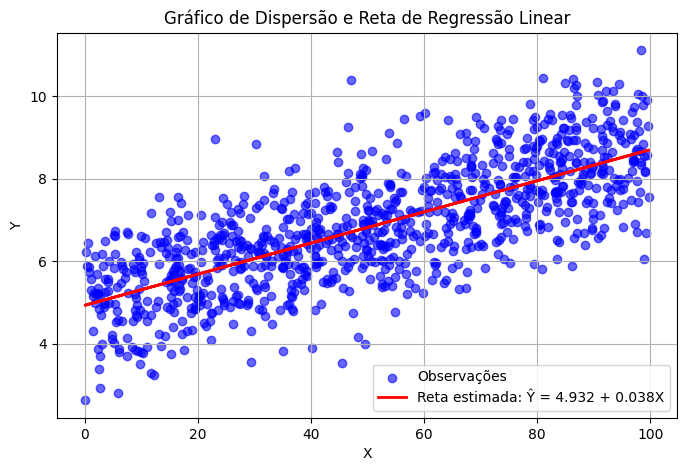

In [19]:
import matplotlib.pyplot as plt

# 5. Criar os valores ajustados
Y_chapeu = alfa_chapeu + beta_chapeu * X

# 6. Plotar o gráfico de dispersão + reta estimada
plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='blue', label='Observações', alpha=0.6)
plt.plot(X, Y_chapeu, color='red', linewidth=2, label=f'Reta estimada: Ŷ = {alfa_chapeu:.3f} + {beta_chapeu:.3f}X')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersão e Reta de Regressão Linear')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
residuos = Y - Y_chapeu

# 2. Somatórios de quadrados
SQT = np.sum((Y - Y.mean())**2)          # Soma total dos quadrados (Total Sum of Squares)
SQE = np.sum(residuos**2)                # Soma dos quadrados dos erros (Error Sum of Squares)
SQR = np.sum((Y_chapeu - Y.mean())**2)      # Soma dos quadrados da regressão (Regression Sum of Squares)

# 3. Coeficiente de determinação
R2 = SQR / SQT

# 4. Exibir resultados arredondados
print(f"SQT (Total) = {SQT:.4f}")
print(f"SQR (Regressão) = {SQR:.4f}")
print(f"SQE (Erro) = {SQE:.4f}")
print(f"R² = {R2:.4f}")

SQT (Total) = 2089.4302
SQR (Regressão) = 1144.4274
SQE (Erro) = 945.0028
R² = 0.5477


In [24]:
from scipy.stats import t

n = len(X)

# Estimadores MQO
Sxx = np.sum((X - X_media)**2)
beta_hat = np.sum((X - X_media)*(Y - Y_media)) / Sxx
alpha_hat = Y_media - beta_hat*X_media

# Resíduos e variância do erro
Y_hat = alpha_hat + beta_hat*X
res = Y - Y_hat
s2 = np.sum(res**2) / (n - 2)          # estimação de σ^2
se_beta = np.sqrt(s2 / Sxx)            # desvio-padrão de β̂

# Função para IC t-Student
def ic_t(beta_hat, se, n, alpha=0.05):
    df = n - 2
    tcrit = t.ppf(1 - alpha/2, df)
    lo = beta_hat - tcrit*se
    hi = beta_hat + tcrit*se
    return lo, hi, tcrit

# ICs
lo95, hi95, t95 = ic_t(beta_hat, se_beta, n, alpha=0.05)
lo99, hi99, t99 = ic_t(beta_hat, se_beta, n, alpha=0.01)

print(f"beta_hat       = {beta_hat:.6f}")
print(f"se(beta_hat)   = {se_beta:.6f}")
print(f"t* (95%)       = {t95:.4f}  | IC95%: [{lo95:.6f}, {hi95:.6f}]")
print(f"t* (99%)       = {t99:.4f}  | IC99%: [{lo99:.6f}, {hi99:.6f}]")

beta_hat       = 0.036159
se(beta_hat)   = 0.001091
t* (95%)       = 1.9623  | IC95%: [0.034017, 0.038300]
t* (99%)       = 2.5808  | IC99%: [0.033342, 0.038975]


In [32]:
from scipy.stats import norm

n = len(X)
alpha = 5
beta = 0.037

# Criar 20 novas amostras (B, C, E) ---
data = {'X': X}

for i in range(1, 21):
    # Coluna B_i: números aleatórios uniformes U(0,1)
    B = np.random.rand(n)
    
    # Coluna C_i: inverso da CDF da normal padrão (INV.NORMP)
    C = norm.ppf(B)
    
    # Coluna E_i: variável Y gerada pelo modelo populacional
    E = alpha + beta * X + C
    
    # Adicionar ao dicionário
    data[f'B{i}'] = B
    data[f'C{i}'] = C
    data[f'E{i}'] = E

# --- Criar DataFrame final ---
df_MC = pd.DataFrame(data)

# --- Visualizar as primeiras linhas ---
print(df_MC.head().round(3))

     X     B1     C1     E1     B2     C2     E2     B3     C3     E3  ...  \
0  0.0  0.594  0.239  5.239  0.325 -0.453  4.547  0.648  0.380  5.380  ...   
1  0.1  0.783  0.782  5.785  0.074 -1.448  3.556  0.728  0.607  5.611  ...   
2  0.2  0.353 -0.378  4.629  0.345 -0.400  4.607  0.640  0.357  5.365  ...   
3  0.3  0.065 -1.516  3.496  0.850  1.037  6.048  0.095 -1.308  3.703  ...   
4  0.4  0.741  0.646  5.661  0.930  1.476  6.491  0.831  0.958  5.973  ...   

     E17    B18    C18    E18    B19    C19    E19    B20    C20    E20  
0  5.024  0.268 -0.620  4.380  0.182 -0.908  4.092  0.754  0.686  5.686  
1  3.880  0.605  0.266  5.270  0.433 -0.170  4.834  0.663  0.421  5.425  
2  3.507  0.909  1.337  6.344  0.327 -0.448  4.560  0.594  0.238  5.245  
3  5.198  0.423 -0.193  4.818  0.080 -1.402  3.609  0.782  0.780  5.792  
4  5.426  0.880  1.175  6.190  0.634  0.342  5.357  0.917  1.383  6.398  

[5 rows x 61 columns]


Betas estimados: [0.03798 0.03582 0.03544 0.03665 0.03426 0.03785 0.03818 0.03914 0.03663
 0.03676 0.03829 0.03761 0.03674 0.03912 0.03813 0.03883 0.03666 0.03787
 0.03777 0.03577]
Média das estimativas: 0.03727
Desvio padrão das estimativas: 0.00126


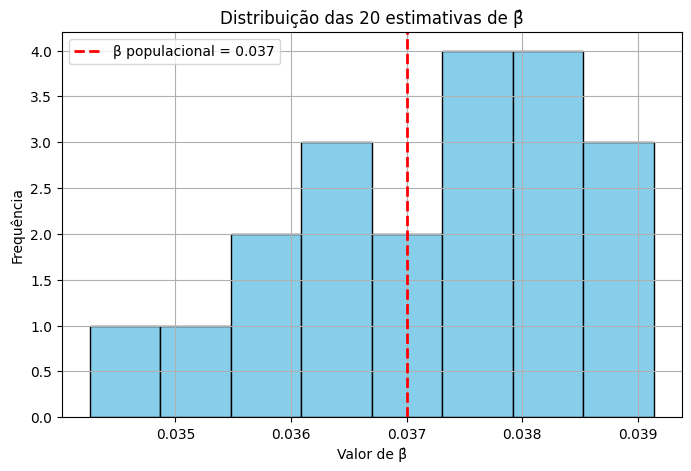

In [33]:
import numpy as np

# Lista para armazenar os betas estimados
betas_chapeu = []

# Calcular beta_chapeu para cada uma das 20 amostras
for i in range(1, 21):
    Y = df_MC[f'E{i}'].values
    X_media = X.mean()
    Y_media = Y.mean()
    beta_chapeu = np.sum((X - X_media)*(Y - Y_media)) / np.sum((X - X_media)**2)
    betas_chapeu.append(beta_chapeu)

# Converter para array e mostrar resultados
betas_chapeu = np.array(betas_chapeu)
print("Betas estimados:", np.round(betas_chapeu, 5))
print(f"Média das estimativas: {betas_chapeu.mean():.5f}")
print(f"Desvio padrão das estimativas: {betas_chapeu.std():.5f}")

# Plotar histograma das estimativas
plt.figure(figsize=(8,5))
plt.hist(betas_chapeu, bins=8, color='skyblue', edgecolor='black')
plt.axvline(beta, color='red', linestyle='--', linewidth=2, label=f'β populacional = {beta}')
plt.title('Distribuição das 20 estimativas de β̂')
plt.xlabel('Valor de β̂')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
from scipy.stats import t

n = len(X)
Xbar = X.mean()
Sxx = np.sum((X - Xbar)**2)     # mesmo para todas as amostras, X é fixo
df_gl = n - 2                   # graus de liberdade
t95 = t.ppf(1 - 0.05/2, df_gl)  # crítico t para 95%

resultados = []

for i in range(1, 21):
    Y = df_MC[f'E{i}'].values

    # (i) beta_hat
    Ybar = Y.mean()
    beta_hat = np.sum((X - Xbar)*(Y - Ybar)) / Sxx

    # alfa_hat (para resíduos)
    alpha_hat = Ybar - beta_hat * Xbar

    # valores ajustados e resíduos
    Y_hat = alpha_hat + beta_hat * X
    residuos = Y - Y_hat

    # variância do erro e (ii) erro-padrão de beta_hat
    s2 = np.sum(residuos**2) / df_gl
    se_beta = np.sqrt(s2 / Sxx)

    # (iii) IC 95% para beta
    lo95 = beta_hat - t95 * se_beta
    hi95 = beta_hat + t95 * se_beta

    resultados.append({
        "amostra": i,
        "beta_hat": beta_hat,
        "se_beta": se_beta,
        "IC95_lo": lo95,
        "IC95_hi": hi95
    })

# Tabela final
tabela = pd.DataFrame(resultados)
print(tabela.round(6))

# (opcional) quantas CIs contêm o beta verdadeiro?
conta_cobertura = ((tabela["IC95_lo"] <= beta) & (tabela["IC95_hi"] >= beta)).sum()
print(f"\nCobertura 95%: {conta_cobertura}/20 CIs contêm o β verdadeiro ({beta}).")

    amostra  beta_hat   se_beta   IC95_lo   IC95_hi
0         1  0.037977  0.001131  0.035758  0.040196
1         2  0.035817  0.001098  0.033662  0.037973
2         3  0.035445  0.001076  0.033333  0.037557
3         4  0.036647  0.001061  0.034565  0.038729
4         5  0.034262  0.001084  0.032134  0.036389
5         6  0.037850  0.001127  0.035638  0.040062
6         7  0.038178  0.001105  0.036011  0.040346
7         8  0.039135  0.001091  0.036995  0.041276
8         9  0.036629  0.001087  0.034497  0.038762
9        10  0.036764  0.001108  0.034590  0.038938
10       11  0.038289  0.001103  0.036125  0.040454
11       12  0.037610  0.001120  0.035412  0.039808
12       13  0.036742  0.001074  0.034635  0.038850
13       14  0.039120  0.001083  0.036996  0.041245
14       15  0.038133  0.001097  0.035981  0.040286
15       16  0.038830  0.001100  0.036672  0.040988
16       17  0.036655  0.001120  0.034458  0.038852
17       18  0.037866  0.001078  0.035751  0.039981
18       19 

In [35]:
# Verificar se algum é idêntico ao beta populacional
iguais = np.isclose(betas_chapeu, beta, atol=1e-10)
print(f"Algum β̂ é exatamente igual a β populacional? {iguais.any()}")

Algum β̂ é exatamente igual a β populacional? False


=== 100 repetições ===
mean_beta: 0.036949
var_beta: 0.000001
mean_se_beta: 0.001094
coverage_95_beta_true: 0.960000
coverage_99_beta_true: 0.990000

Exemplos de ICs 95% (primeiros 5):
β̂=0.036240 | IC95% [0.034125, 0.038355]
β̂=0.038487 | IC95% [0.036274, 0.040700]
β̂=0.036906 | IC95% [0.034764, 0.039048]
β̂=0.037437 | IC95% [0.035302, 0.039573]
β̂=0.035100 | IC95% [0.032946, 0.037253]

=== 1000 repetições ===
mean_beta: 0.037001
var_beta: 0.000001
mean_se_beta: 0.001094
coverage_95_beta_true: 0.944000
coverage_99_beta_true: 0.984000

Exemplos de ICs 99% (primeiros 5):
β̂=0.034916 | IC99% [0.032146, 0.037687]
β̂=0.038227 | IC99% [0.035368, 0.041086]
β̂=0.034691 | IC99% [0.031962, 0.037420]
β̂=0.036287 | IC99% [0.033388, 0.039187]
β̂=0.037487 | IC99% [0.034722, 0.040251]


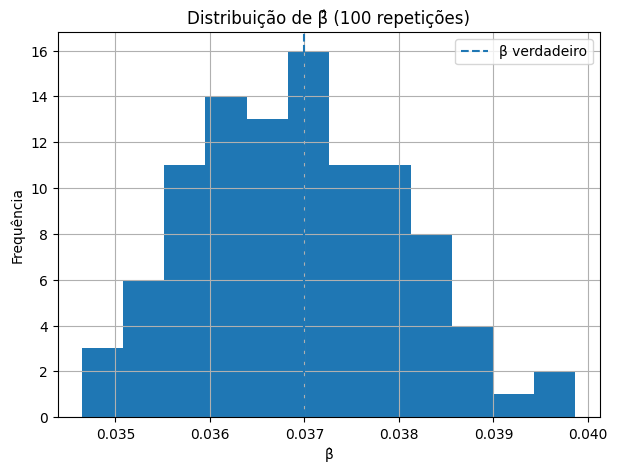

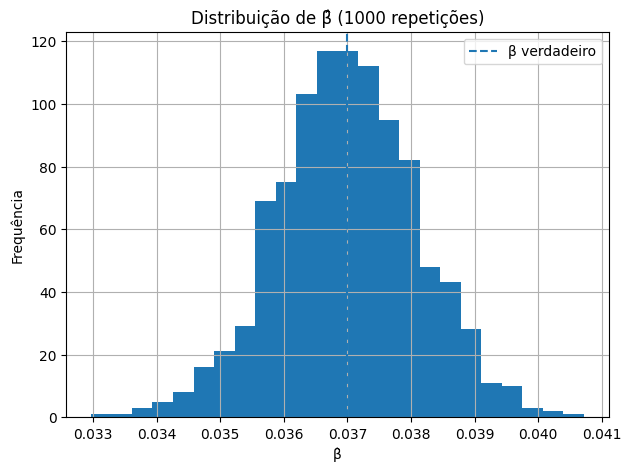

In [37]:
import numpy as np
from scipy.stats import norm, t
import matplotlib.pyplot as plt

# --- Parâmetros e dados fixos ---
alpha = 5.0
beta_true = 0.037
n = len(X)
Xbar = X.mean()
Sxx = np.sum((X - Xbar)**2)
df_gl = n - 2

# t críticos para 95% e 99%
t95 = t.ppf(1 - 0.05/2, df_gl)
t99 = t.ppf(1 - 0.01/2, df_gl)

def run_mc(num_reps):
    betas = np.empty(num_reps)
    se_betas = np.empty(num_reps)
    lo95 = np.empty(num_reps); hi95 = np.empty(num_reps)
    lo99 = np.empty(num_reps); hi99 = np.empty(num_reps)

    for r in range(num_reps):
        # erro ~ N(0,1) via inversa da CDF aplicada a U(0,1)
        u = norm.ppf(np.random.rand(n))
        Y = alpha + beta_true * X + u

        # MQO manual
        Ybar = Y.mean()
        beta_hat = np.sum((X - Xbar)*(Y - Ybar)) / Sxx
        alpha_hat = Ybar - beta_hat * Xbar

        # resíduos, s^2, se(beta_hat)
        Y_hat = alpha_hat + beta_hat * X
        res = Y - Y_hat
        s2 = np.sum(res**2) / df_gl
        se_beta = np.sqrt(s2 / Sxx)

        # ICs: 95% e 99%
        lo95[r] = beta_hat - t95 * se_beta
        hi95[r] = beta_hat + t95 * se_beta
        lo99[r] = beta_hat - t99 * se_beta
        hi99[r] = beta_hat + t99 * se_beta

        betas[r] = beta_hat
        se_betas[r] = se_beta

    # métricas de resumo
    summary = {
        "mean_beta": betas.mean(),
        "var_beta": betas.var(),
        "mean_se_beta": se_betas.mean(),
        "coverage_95_beta_true": np.mean((lo95 <= beta_true) & (hi95 >= beta_true)),
        "coverage_99_beta_true": np.mean((lo99 <= beta_true) & (hi99 >= beta_true))
    }
    return betas, se_betas, lo95, hi95, lo99, hi99, summary

# --- Rodar 100 e 1000 repetições ---
betas_100, se_100, lo95_100, hi95_100, lo99_100, hi99_100, sum_100 = run_mc(100)
betas_1000, se_1000, lo95_1000, hi95_1000, lo99_1000, hi99_1000, sum_1000 = run_mc(1000)

print("=== 100 repetições ===")
for k, v in sum_100.items():
    print(f"{k}: {v:.6f}")
print("\nExemplos de ICs 95% (primeiros 5):")
for i in range(5):
    print(f"β̂={betas_100[i]:.6f} | IC95% [{lo95_100[i]:.6f}, {hi95_100[i]:.6f}]")

print("\n=== 1000 repetições ===")
for k, v in sum_1000.items():
    print(f"{k}: {v:.6f}")
print("\nExemplos de ICs 99% (primeiros 5):")
for i in range(5):
    print(f"β̂={betas_1000[i]:.6f} | IC99% [{lo99_1000[i]:.6f}, {hi99_1000[i]:.6f}]")

# (Opcional) Histogramas dos β̂
plt.figure(figsize=(7,5))
plt.hist(betas_100, bins=12)
plt.axvline(beta_true, linestyle='--', label='β verdadeiro')
plt.title('Distribuição de β̂ (100 repetições)')
plt.xlabel('β̂'); plt.ylabel('Frequência'); plt.legend(); plt.grid(True)
plt.show()

plt.figure(figsize=(7,5))
plt.hist(betas_1000, bins=24)
plt.axvline(beta_true, linestyle='--', label='β verdadeiro')
plt.title('Distribuição de β̂ (1000 repetições)')
plt.xlabel('β̂'); plt.ylabel('Frequência'); plt.legend(); plt.grid(True)
plt.show()

In [42]:
def cobertura_count(lo, hi, beta_true):
    mask = (lo <= beta_true) & (hi >= beta_true)
    return int(mask.sum()), float(mask.mean())  # (count, fraction)

# 100 repetições
c95_100, p95_100 = cobertura_count(lo95_100, hi95_100, beta_true)
c99_100, p99_100 = cobertura_count(lo99_100, hi99_100, beta_true)

# 1000 repetições
c95_1000, p95_1000 = cobertura_count(lo95_1000, hi95_1000, beta_true)
c99_1000, p99_1000 = cobertura_count(lo99_1000, hi99_1000, beta_true)

print("=== Cobertura (contagem e proporção) ===")
print(f"100 reps | IC95%:  {c95_100}/100  ({p95_100: .3%})")
print(f"100 reps | IC99%:  {c99_100}/100  ({p99_100: .3%})")
print(f"1000 reps| IC95%:  {c95_1000}/1000 ({p95_1000: .3%})")
print(f"1000 reps| IC99%:  {c99_1000}/1000 ({p99_1000: .3%})")

=== Cobertura (contagem e proporção) ===
100 reps | IC95%:  96/100  ( 96.000%)
100 reps | IC99%:  99/100  ( 99.000%)
1000 reps| IC95%:  944/1000 ( 94.400%)
1000 reps| IC99%:  984/1000 ( 98.400%)


----- 100 repetições -----
Média β̂ = 0.03707
Variância β̂ = 0.00000123

----- 1000 repetições -----
Média β̂ = 0.03702
Variância β̂ = 0.00000118


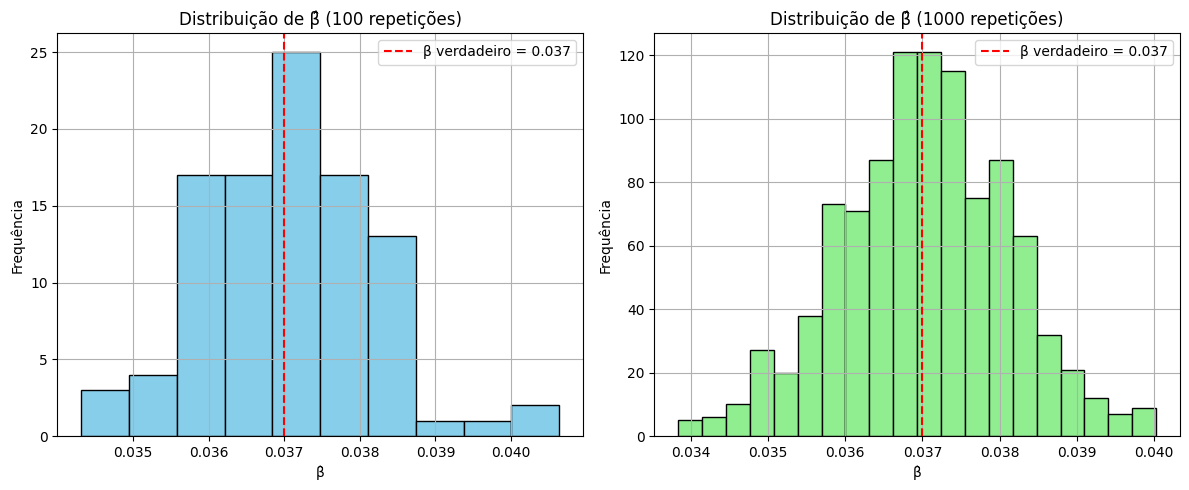

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros populacionais
alpha = 5
beta = 0.037
n = 1000  # tamanho amostral fixo
X = np.linspace(0, 100, n)  # X fixo, como no seu experimento

def simular_betas(num_reps):
    betas = []
    for _ in range(num_reps):
        # Gera ruído normal padrão (equivalente a INV.NORMP(ALEATÓRIO()))
        erro = norm.ppf(np.random.rand(n))
        # Gera Y a partir do modelo populacional
        Y = alpha + beta * X + erro
        # Calcula beta_hat por MQO
        beta_hat = np.sum((X - X.mean())*(Y - Y.mean())) / np.sum((X - X.mean())**2)
        betas.append(beta_hat)
    return np.array(betas)

# Simulações com 100 e 1000 repetições
betas_100 = simular_betas(100)
betas_1000 = simular_betas(1000)

# Estatísticas resumo
print("----- 100 repetições -----")
print(f"Média β̂ = {betas_100.mean():.5f}")
print(f"Variância β̂ = {betas_100.var():.8f}")
print()
print("----- 1000 repetições -----")
print(f"Média β̂ = {betas_1000.mean():.5f}")
print(f"Variância β̂ = {betas_1000.var():.8f}")

# Gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma 100 repetições
axes[0].hist(betas_100, bins=10, color='skyblue', edgecolor='black')
axes[0].axvline(beta, color='red', linestyle='--', label=f'β verdadeiro = {beta}')
axes[0].set_title('Distribuição de β̂ (100 repetições)')
axes[0].set_xlabel('β̂')
axes[0].set_ylabel('Frequência')
axes[0].legend()
axes[0].grid(True)

# Histograma 1000 repetições
axes[1].hist(betas_1000, bins=20, color='lightgreen', edgecolor='black')
axes[1].axvline(beta, color='red', linestyle='--', label=f'β verdadeiro = {beta}')
axes[1].set_title('Distribuição de β̂ (1000 repetições)')
axes[1].set_xlabel('β̂')
axes[1].set_ylabel('Frequência')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [44]:
# Criar 20 novas amostras com correlação entre u e X ---
data_vvo = {'X': X}

for i in range(1, 21):
    # Passo 1: gerar ruído normal padrão (como antes)
    B = np.random.rand(n)
    u = norm.ppf(B)  # u ~ N(0,1)

    # Passo 2: gerar novo erro dependente de X → u* = u + 0.35*X
    u_dep = u + 0.35 * X

    # Passo 3: gerar Y = α + βX + u*
    Y = alpha + beta * X + u_dep

    # Armazenar as colunas no DataFrame
    data_vvo[f'B{i}'] = B
    data_vvo[f'U{i}'] = u_dep
    data_vvo[f'Y{i}'] = Y

# --- 4. Criar DataFrame final ---
df_vvo = pd.DataFrame(data_vvo)

# --- 5. Visualizar as primeiras linhas ---
print(df_vvo.head().round(3))

     X     B1     U1     Y1     B2     U2     Y2     B3     U3     Y3  ...  \
0  0.0  0.123 -1.158  3.842  0.933  1.496  6.496  0.406 -0.237  4.763  ...   
1  0.1  0.370 -0.296  4.707  0.441 -0.114  4.890  0.950  1.679  6.683  ...   
2  0.2  0.033 -1.774  3.233  0.611  0.353  5.360  0.893  1.314  6.321  ...   
3  0.3  0.992  2.510  7.521  0.440 -0.046  4.965  0.384 -0.189  4.822  ...   
4  0.4  0.739  0.779  5.794  0.607  0.411  5.426  0.192 -0.730  4.285  ...   

     Y17    B18    U18    Y18    B19    U19    Y19    B20    U20    Y20  
0  4.872  0.729  0.609  5.609  0.737  0.634  5.634  0.142 -1.072  3.928  
1  3.331  0.983  2.161  7.165  0.433 -0.134  4.869  0.138 -1.053  3.951  
2  4.830  0.847  1.094  6.102  0.795  0.895  5.903  0.816  0.971  5.978  
3  6.351  0.099 -1.184  3.827  0.610  0.383  5.394  0.706  0.648  5.659  
4  4.849  0.571  0.320  5.335  0.368 -0.197  4.817  0.730  0.754  5.769  

[5 rows x 61 columns]


Betas estimados (VVO): [0.38815 0.38599 0.38764 0.38732 0.38528 0.38846 0.38606 0.38792 0.38835
 0.38703 0.38669 0.38582 0.38654 0.38849 0.38538 0.38667 0.38667 0.38689
 0.38774 0.38585]
Média das estimativas β̂ = 0.38695
Desvio-padrão das estimativas = 0.00100
Algum β̂ é idêntico a β populacional (0.037)? False


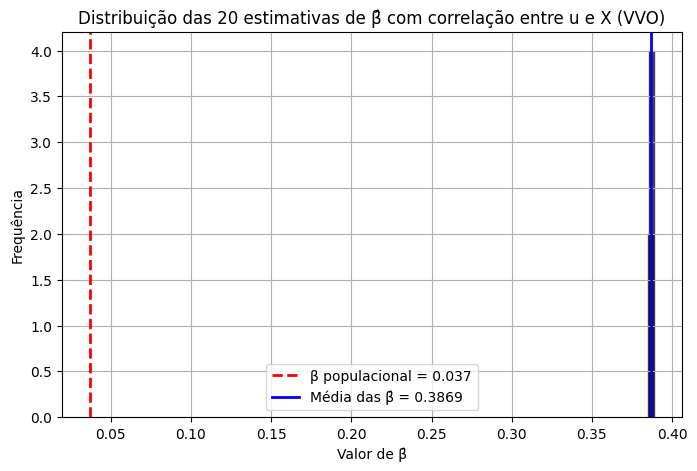

In [45]:
# Lista para armazenar os betas estimados
betas_vvo = []

# Calcular β̂ para cada uma das 20 amostras geradas com dependência u + 0.35X
for i in range(1, 21):
    Y = df_vvo[f'Y{i}'].values
    X_media = X.mean()
    Y_media = Y.mean()
    beta_chapeu = np.sum((X - X_media)*(Y - Y_media)) / np.sum((X - X_media)**2)
    betas_vvo.append(beta_chapeu)

# Converter em array
betas_vvo = np.array(betas_vvo)

# Exibir resultados numéricos
print("Betas estimados (VVO):", np.round(betas_vvo, 5))
print(f"Média das estimativas β̂ = {betas_vvo.mean():.5f}")
print(f"Desvio-padrão das estimativas = {betas_vvo.std():.5f}")
print(f"Algum β̂ é idêntico a β populacional (0.037)? {np.isclose(betas_vvo, beta, atol=1e-10).any()}")

# Plotar histograma das estimativas
plt.figure(figsize=(8,5))
plt.hist(betas_vvo, bins=8, color='orange', edgecolor='black', alpha=0.7)
plt.axvline(beta, color='red', linestyle='--', linewidth=2, label=f'β populacional = {beta}')
plt.axvline(betas_vvo.mean(), color='blue', linestyle='-', linewidth=2, label=f'Média das β̂ = {betas_vvo.mean():.4f}')
plt.title('Distribuição das 20 estimativas de β̂ com correlação entre u e X (VVO)')
plt.xlabel('Valor de β̂')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()

--- 100 repetições ---
Média(β̂) = 0.38717
Variância(β̂) = 0.00000083
Desvio-padrão(β̂) = 0.00091
Viés (Média - β_pop) = 0.35017

--- 1000 repetições ---
Média(β̂) = 0.38700
Variância(β̂) = 0.00000116
Desvio-padrão(β̂) = 0.00108
Viés (Média - β_pop) = 0.35000



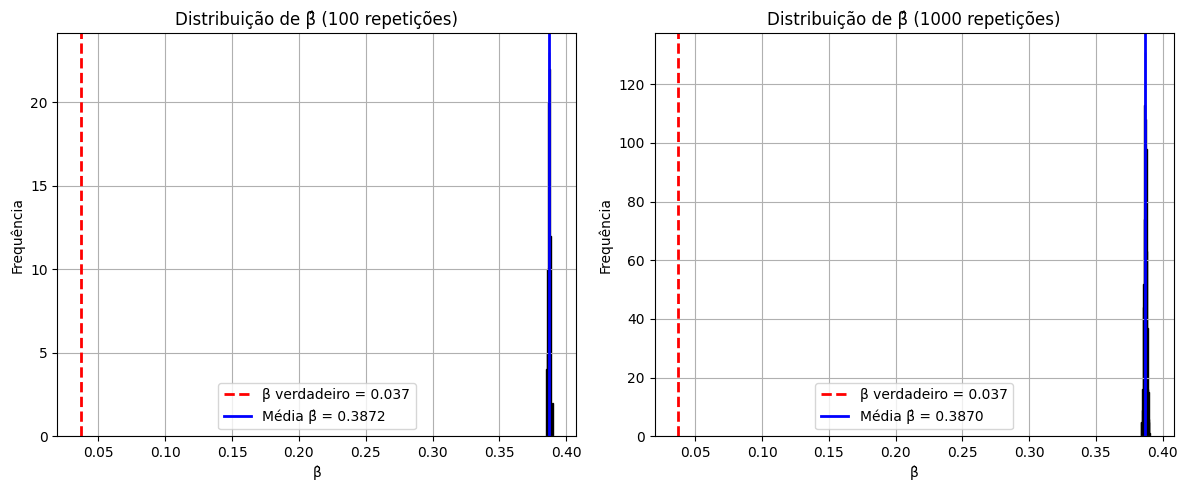

In [46]:
X = np.linspace(0, 100, n)  # X fixo
beta_pop = beta

# --- Função para simular várias repetições com dependência u + 0.35X ---
def simular_vvo(num_reps):
    betas = []
    for _ in range(num_reps):
        # Erro com dependência de X
        u = norm.ppf(np.random.rand(n))
        u_dep = u + 0.35 * X
        Y = alpha + beta * X + u_dep
        beta_hat = np.sum((X - X.mean())*(Y - Y.mean())) / np.sum((X - X.mean())**2)
        betas.append(beta_hat)
    return np.array(betas)

# --- Simulações: 100 e 1000 repetições ---
betas_100 = simular_vvo(100)
betas_1000 = simular_vvo(1000)

# --- Estatísticas resumo ---
def resumo(betas, label):
    print(f"--- {label} ---")
    print(f"Média(β̂) = {betas.mean():.5f}")
    print(f"Variância(β̂) = {betas.var():.8f}")
    print(f"Desvio-padrão(β̂) = {betas.std():.5f}")
    print(f"Viés (Média - β_pop) = {betas.mean() - beta_pop:.5f}")
    print()

resumo(betas_100, "100 repetições")
resumo(betas_1000, "1000 repetições")

# --- Gráficos lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].hist(betas_100, bins=10, color='orange', edgecolor='black')
axes[0].axvline(beta_pop, color='red', linestyle='--', linewidth=2, label=f'β verdadeiro = {beta_pop}')
axes[0].axvline(betas_100.mean(), color='blue', linestyle='-', linewidth=2, label=f'Média β̂ = {betas_100.mean():.4f}')
axes[0].set_title('Distribuição de β̂ (100 repetições)')
axes[0].set_xlabel('β̂')
axes[0].set_ylabel('Frequência')
axes[0].legend()
axes[0].grid(True)

axes[1].hist(betas_1000, bins=20, color='gold', edgecolor='black')
axes[1].axvline(beta_pop, color='red', linestyle='--', linewidth=2, label=f'β verdadeiro = {beta_pop}')
axes[1].axvline(betas_1000.mean(), color='blue', linestyle='-', linewidth=2, label=f'Média β̂ = {betas_1000.mean():.4f}')
axes[1].set_title('Distribuição de β̂ (1000 repetições)')
axes[1].set_xlabel('β̂')
axes[1].set_ylabel('Frequência')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()